# Case Study-3: Electricity Demand Estimation

#### 1.Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf_ols
import statsmodels.tsa.api as smt
!pip install stldecompose

#### 2.Importing data

In [191]:
data = pd.read_csv('Electricity Consumption.csv')

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [11]:
pd.concat([data.head(),data.tail()])

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765
560,9/1/2019,109.7190


In [193]:
# Converting data to time series data
data.DATE = pd.to_datetime(data.DATE,format='%m/%d/%Y')
data.set_index(data.DATE,inplace=True,drop=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.1 KB


In [194]:
# including year and month column separately
data['year'] = data.DATE.dt.year
data['month'] = data.DATE.dt.month

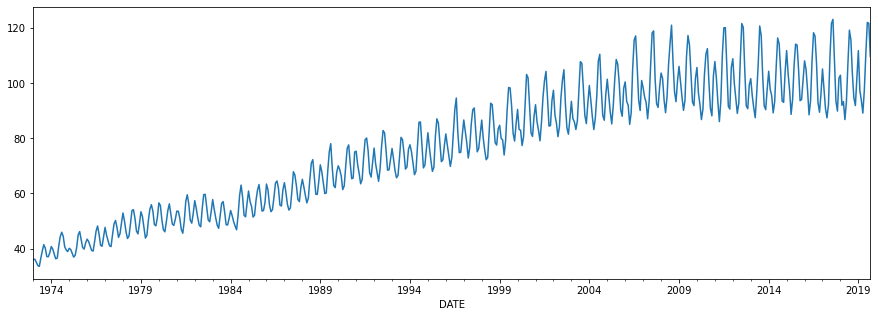

In [15]:
# Plotting the consumption 
data.Electricty_Consumption_in_TW.plot(figsize=(15,5))
plt.show()

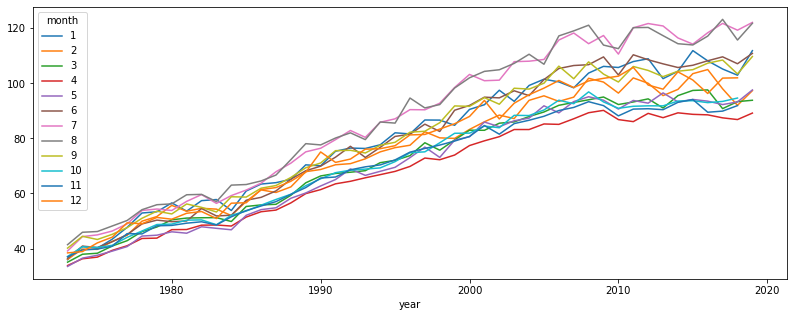

In [16]:
pd.pivot_table(data = data, index = 'year', columns = 'month',
               values = 'Electricty_Consumption_in_TW').plot(figsize=(13.5,5))
plt.show()
# Monthly consumption on yearly basis shows that there is a positive linear trend .
# As years pass by there is an increase in  electricity consumption.

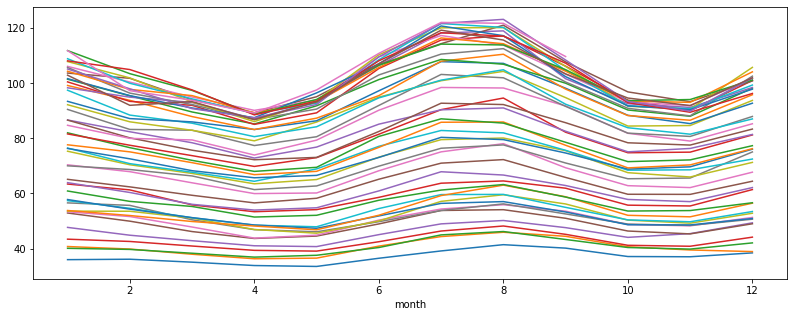

In [17]:
pd.pivot_table(data = data, index = 'month', columns = 'year',
               values = 'Electricty_Consumption_in_TW').plot(figsize=(13.5,5),legend= None)
plt.show()

# NOTE #


1. Monthly comparison shows that consumptions reaches its 
maximum value in the month of August.
2. Consumption dips from January to April and from there it increases linearly till it reaches it max   values in August, and then again starts decreasing till November and then increases for a bit in     the month of December. 
3. Every year from 1973 to 2019 shows this trend.


#### Model used to forecast electricty consumption
      1.Decompistion model
      2.SARIMA model
      3.ETS model
      4.fb Prophet model

#### 1.Decompistion model

##### # Decompostion using statsmodel.tsa package

In [18]:
consp = data.Electricty_Consumption_in_TW
decom = seasonal_decompose(consp,model='additive')# additive decomposition

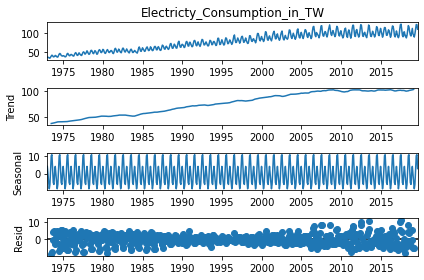

In [19]:
# plotting different components (ie-trend seasonality,irregular component)
decom.plot()
plt.show()

In [20]:
decompose = pd.concat([decom.observed, decom.trend, decom.seasonal, decom.resid], axis=1)
decompose.columns = ['Observed','Trend','Seasonal','Residual']
decompose.head(12)

,Observed,Trend,Seasonal,Residual
DATE,,,,
1973-01-01,35.9728,NaN,4.135755,NaN
1973-02-01,36.1334,NaN,-0.705922,NaN
1973-03-01,35.0625,NaN,-4.489678,NaN
1973-04-01,33.8416,NaN,-8.668415,NaN
1973-05-01,33.5107,NaN,-6.044817,NaN
1973-06-01,36.4823,NaN,2.943116,NaN
1973-07-01,39.1412,37.223388,10.277826,-8.360014
1973-08-01,41.4137,37.576442,10.828421,-6.991163
1973-09-01,40.1639,37.850562,2.891998,-0.578660


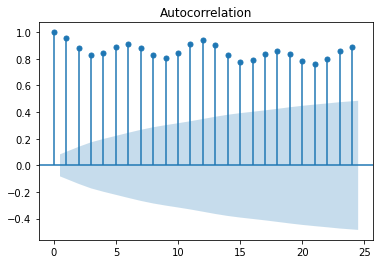

In [21]:
# Auto correlation for consumption
smt.graphics.plot_acf(consp, lags=24)
plt.show()

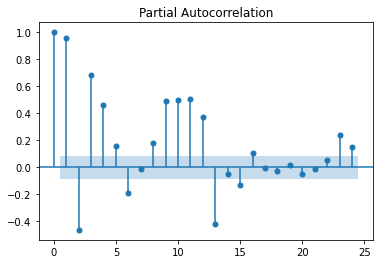

In [22]:
# Partial Auto correlation  for consumption
smt.graphics.plot_pacf(consp, lags = 24, method='ols')
plt.show()


##### # Decompostion using stldecompose package

In [ ]:
import stldecompose
from stldecompose import  forecast,decompose
from stldecompose.forecast_funcs import drift,naive,seasonal_naive,mean

In [ ]:
stl_decomp = decompose(data.Electricty_Consumption_in_TW,period=12)

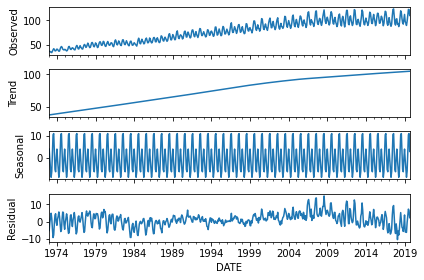

In [ ]:
stl_decomp.plot()
plt.show()

In [ ]:
decomposition = pd.concat([stl_decomp.observed,
                           stl_decomp.trend, stl_decomp.seasonal, stl_decomp.resid], axis=1)
# Giving column names #
decomposition.columns = ['Observed','Trend','Seasonal','Residual']

In [ ]:
decomposition.head(2)

,Observed,Trend,Seasonal,Residual
DATE,,,,
1973-01-01,35.9728,37.267425,3.982933,-5.277558
1973-02-01,36.1334,37.408595,-0.727961,-0.547234


In [ ]:
f_cast = forecast(stl_decomp,steps=24,fc_func = drift,seasonal=True)
f_cast.head(2)

,drift+seasonal
2019-10-02,99.491033
2019-11-02,98.478161


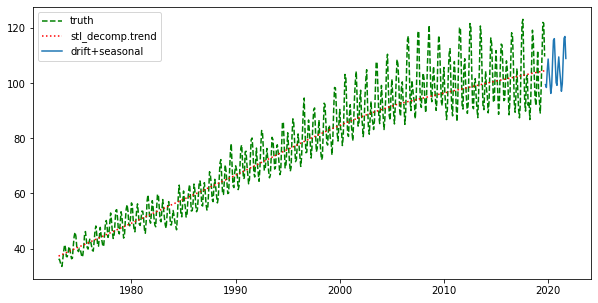

In [ ]:
# Plot for observed and forecasted value
plt.figure(figsize = (10,5))
plt.plot(consp,'--',label = 'truth',color='green')
plt.plot(decomposition.Trend,':',label = 'stl_decomp.trend',color = 'red')
plt.plot(f_cast,'-',label = f_cast.columns[0])
plt.legend()
plt.show()

In [197]:
# Splitting data into train and test #
train = data[:'2019-02-01']
test = data['2019-03-01':]

In [ ]:
# Training the decompostion model on train data
train_decomp = decompose(train.Electricty_Consumption_in_TW,period = 12)
# Forecasting for next 7 months using decomposition model
fcast = forecast(train_decomp,steps = 7,fc_func=drift, seasonal=True)
fcast.columns = ['Forecast']
fcast

,Forecast
2019-03-04,99.830121
2019-04-04,95.661182
2019-05-05,98.266258
2019-06-05,107.174669
2019-07-06,114.655095
2019-08-06,115.274320
2019-09-06,107.391135


In [ ]:
check = pd.DataFrame()
check['Actual'] = pd.Series(test.Electricty_Consumption_in_TW.values)
check['Forecast'] = pd.Series(fcast.Forecast.values)

In [ ]:
# Forward testing
print('MAPE for test data-',np.mean(np.abs(check.Actual-check.Forecast)/check.Actual)*100,'%')

MAPE for test data- 4.460087633550844 %


In [ ]:
# Fitting  decompostion model on complete data
train_decomp = decompose(data.Electricty_Consumption_in_TW,period = 12)

# Forecasting for next 24 months using decomposition model
fcast_decomp_24 = forecast(train_decomp,steps = 24,fc_func=drift, seasonal=True)
fcast_decomp_24.columns = ['Forecast']
fcast_decomp_24

,Forecast
2019-10-02,99.491033
2019-11-02,98.478161
2019-12-03,104.828313
2020-01-03,108.803301
2020-02-03,104.157271
2020-03-05,100.508693
2020-04-05,96.329098
2020-05-06,99.057081
2020-06-06,108.057989
2020-07-07,115.618123


#### 2.SARIMA model

In [195]:
from statsmodels.tsa.stattools import acf,pacf_ols
import statsmodels.tsa.api as smt

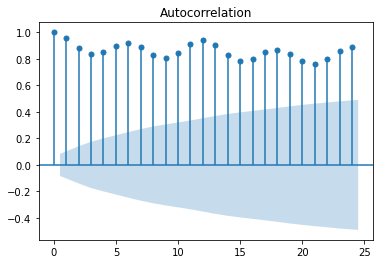

In [198]:
# Plotting Auto correlation for the train data
smt.graphics.plot_acf(train.Electricty_Consumption_in_TW,lags=24)
plt.show()

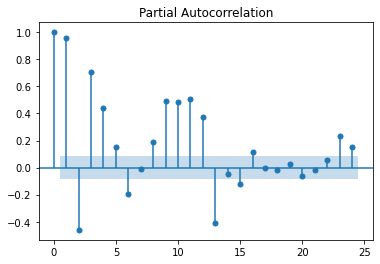

In [199]:
# Plotting  Partial auto correlation for the train data
smt.graphics.plot_pacf(train.Electricty_Consumption_in_TW,lags=24,method = 'ols')
plt.show()

In [ ]:
# Checking for stationary series

# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(train.Electricty_Consumption_in_TW)   
# p-value: 0.26285 
# since p-value is high, the series is not stationary

(-2.0553199897779586,
 0.26285578970085305,
 15,
 538,
 {'1%': -3.442563336759378,
  '10%': -2.5696391843672695,
  '5%': -2.866927190004947},
 2266.4561922112803)

In [ ]:
# Performing log transformation
adfuller(np.log(train.Electricty_Consumption_in_TW))

(-3.191394361510716,
 0.02048824252545277,
 15,
 538,
 {'1%': -3.442563336759378,
  '10%': -2.5696391843672695,
  '5%': -2.866927190004947},
 -2480.261116106376)

In [ ]:
# Performing differencing on top of log transformation
adfuller(np.log(train.Electricty_Consumption_in_TW).diff().dropna())

(-6.88927190831652,
 1.3689066086331508e-09,
 14,
 538,
 {'1%': -3.442563336759378,
  '10%': -2.5696391843672695,
  '5%': -2.866927190004947},
 -2468.70072901355)

In [ ]:
# Performing differencing only
adfuller(train.Electricty_Consumption_in_TW.diff().dropna())

(-8.067114135258535,
 1.585355422501086e-12,
 14,
 538,
 {'1%': -3.442563336759378,
  '10%': -2.5696391843672695,
  '5%': -2.866927190004947},
 2264.688046456126)

 #### NOTE
1. Using differencing only gives the best result(smallest 
p-value)
2. To make our series stationary,one time differencing is performed

In [200]:
# Making the time series stationary
stationary_ser = train.Electricty_Consumption_in_TW.diff().dropna()

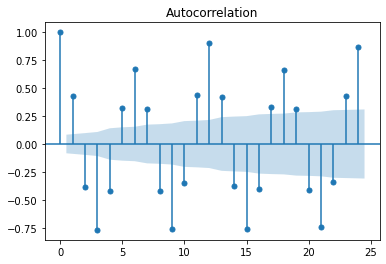

In [201]:
# Plotting Auto correlation for the  stationary train data
smt.graphics.plot_acf(stationary_ser,lags=24)
plt.show()

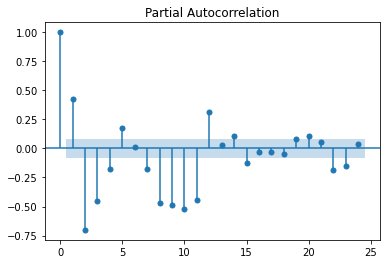

In [202]:
# Plotting Partial Auto correlation for the  stationary train data
smt.graphics.plot_pacf(stationary_ser,lags=24)
plt.show()

In [ ]:
# For this series d=1,when differencing is applied p values is the smallest as compared to (log transformed) and (log and differencing combined).
# For SARIMA model,train.Electricty_Consumption_in_TW is used as input.

In [203]:
# UDF for finding (p,d,q) and (P,D,Q) value for ARIMA
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [204]:
# Getting best value for (p,d,q) and (P,D,Q)
best_results = auto_arima(train.Electricty_Consumption_in_TW,  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 3), D=range(0, 2), Q=range(0, 3)) 

SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:3665.473822546378
SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:3262.265947703763
SARIMAX(0, 2, 0)x(0, 0, 2, 12)12 - AIC:3078.87833306878
SARIMAX(0, 2, 0)x(0, 1, 0, 12)12 - AIC:2898.7692792381085
SARIMAX(0, 2, 0)x(0, 1, 1, 12)12 - AIC:2637.356814623497
SARIMAX(0, 2, 0)x(0, 1, 2, 12)12 - AIC:2587.41377209709
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:2880.820311623899
SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:2668.177121701607
SARIMAX(0, 2, 0)x(1, 0, 2, 12)12 - AIC:2617.677912608803
SARIMAX(0, 2, 0)x(1, 1, 0, 12)12 - AIC:2761.8144124602586
SARIMAX(0, 2, 0)x(1, 1, 1, 12)12 - AIC:2639.356125892158
SARIMAX(0, 2, 0)x(1, 1, 2, 12)12 - AIC:2587.2812027212876
SARIMAX(0, 2, 0)x(2, 0, 0, 12)12 - AIC:2758.366074196584
SARIMAX(0, 2, 0)x(2, 0, 1, 12)12 - AIC:2624.268762569747
SARIMAX(0, 2, 0)x(2, 0, 2, 12)12 - AIC:2615.647822778857
SARIMAX(0, 2, 0)x(2, 1, 0, 12)12 - AIC:2647.9478591143475
SARIMAX(0, 2, 0)x(2, 1, 1, 12)12 - AIC:2586.9322307548455
SARIMAX(0, 2, 0)x(2, 1, 2, 1

SARIMAX(2, 2, 1)x(2, 1, 2, 12)12 - AIC:2138.3201195322545
SARIMAX(2, 2, 2)x(0, 0, 0, 12)12 - AIC:2948.228703739701
SARIMAX(2, 2, 2)x(0, 0, 1, 12)12 - AIC:2677.9762210468507
SARIMAX(2, 2, 2)x(0, 0, 2, 12)12 - AIC:2566.8599298080762
SARIMAX(2, 2, 2)x(0, 1, 0, 12)12 - AIC:2363.478325418805
SARIMAX(2, 2, 2)x(0, 1, 1, 12)12 - AIC:2143.1513575303934
SARIMAX(2, 2, 2)x(0, 1, 2, 12)12 - AIC:2104.7372577607066
SARIMAX(2, 2, 2)x(1, 0, 0, 12)12 - AIC:2362.2953967651392
SARIMAX(2, 2, 2)x(1, 0, 1, 12)12 - AIC:2161.671713178203
SARIMAX(2, 2, 2)x(1, 0, 2, 12)12 - AIC:2122.6286567623993
SARIMAX(2, 2, 2)x(1, 1, 0, 12)12 - AIC:2246.7159820570605
SARIMAX(2, 2, 2)x(1, 1, 1, 12)12 - AIC:2145.195531032444
SARIMAX(2, 2, 2)x(1, 1, 2, 12)12 - AIC:2103.632151964974
SARIMAX(2, 2, 2)x(2, 0, 0, 12)12 - AIC:2250.859994088803
SARIMAX(2, 2, 2)x(2, 0, 1, 12)12 - AIC:2127.7265659400305
SARIMAX(2, 2, 2)x(2, 0, 2, 12)12 - AIC:2119.717289805024
SARIMAX(2, 2, 2)x(2, 1, 0, 12)12 - AIC:2150.0150916213515
SARIMAX(2, 2, 2)x(2, 

In [205]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train.Electricty_Consumption_in_TW, order = (2,2,2), seasonal_order= (2,2,2,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  554
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 12)   Log Likelihood               -1043.083
Date:                            Sat, 26 Feb 2022   AIC                           2104.166
Time:                                    11:14:22   BIC                           2142.116
Sample:                                01-01-1973   HQIC                          2119.056
                                     - 02-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5377      0.056      9.528      0.000       0.427       0.648
ar.L2         -0.1408      0.048   

In [222]:
# Forward testing
accuracy = pd.DataFrame()
accuracy['F_cast'] = pd.Series(model.forecast(7).values)
accuracy['Actual'] = pd.Series(test.Electricty_Consumption_in_TW.values)
print('MAPE for test value',np.mean((np.abs(accuracy.Actual-accuracy.F_cast)/accuracy.Actual))*100,'%')
SARIMA_fwd_test = np.mean((np.abs(accuracy.Actual-accuracy.F_cast)/accuracy.Actual))*100

MAPE for test value 3.5475298881486137 %


In [223]:
# Backward testing
pred_arima = model.fittedvalues['1973-01-01':]
actual = train.Electricty_Consumption_in_TW['1973-01-01':]
print('Train error:',np.mean(np.abs(actual-pred_arima)/actual)*100,'%')

SARIMA_bwd_test = np.mean(np.abs(actual-pred_arima)/actual)*100

Train error: 2.587484592023813 %


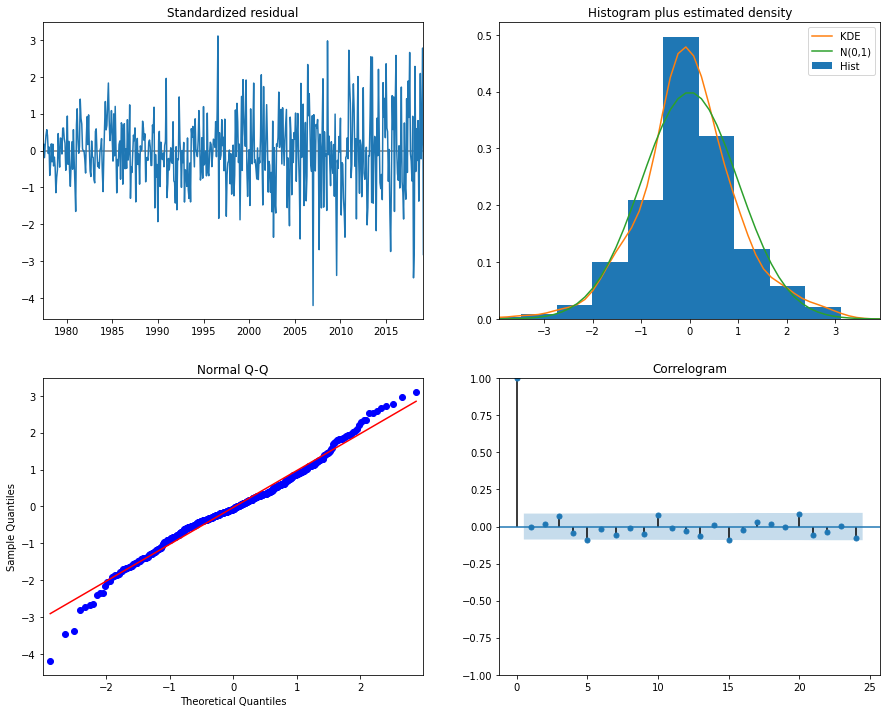

In [ ]:
# Diagnostics plot
model.plot_diagnostics(lags=24, figsize=(15,12))
plt.show()
# observations
# 1.Errors are following normal distribution.
# 2.Correlogram (ACF plot for errors) - values are within Confidenece interval(close to zero)

In [ ]:
model_SARIMA = sm.tsa.statespace.SARIMAX(data.Electricty_Consumption_in_TW, order = (2,2,2), seasonal_order= (2,2,2,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

In [ ]:
fcast_SARIMA = model_SARIMA.forecast(24)  
fcast_SARIMA

2019-10-01     96.282650
2019-11-01     93.613428
2019-12-01    102.996808
2020-01-01    110.894485
2020-02-01    101.924617
2020-03-01     95.976837
2020-04-01     89.841486
2020-05-01     96.421275
2020-06-01    111.879372
2020-07-01    123.437906
2020-08-01    122.938648
2020-09-01    109.712357
2020-10-01     95.539909
2020-11-01     93.082222
2020-12-01    103.404474
2021-01-01    109.415325
2021-02-01    100.784033
2021-03-01     96.127886
2021-04-01     89.494096
2021-05-01     95.882904
2021-06-01    111.704773
2021-07-01    123.706935
2021-08-01    122.328744
2021-09-01    108.803481
Freq: MS, dtype: float64

#### 3.ETS model

In [208]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [209]:
stationary_ser = train.Electricty_Consumption_in_TW.diff().dropna()

In [210]:
# UDF for finding best value of alpha, beta and gamma
from sklearn.metrics import mean_absolute_error

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    score = np.where(np.float64(mean_absolute_error(actual, f_cast)/actual).mean()>0,np.float64(mean_absolute_error(actual, f_cast)/actual).mean(),0)

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])

In [211]:
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6,0.7]

In [212]:
# finding best value for alpha, beta and gamma
auto_hwm(data.Electricty_Consumption_in_TW, val_split_date ='2019-03-01' , alpha=alpha, beta=beta, gamma=gamma, 
              trend='mul', seasonal='mul', periods=12, verbose=True)

Evaluating Exponential Smoothing model for 343 fits

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.3}
Checking for

Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.1}
Checking f

Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.2, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.3, 'gamma': 0.7}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.7, 'beta': 0.4, 'gamma': 0.7}
Checking f

{'alpha': 0.1, 'beta': 0.5, 'gamma': 0.2, 'mae': array(0.00606928)}

In [217]:
# Fitting the ETS model
# 'alpha': 0.1, 'beta': 0.5, 'gamma': 0.2,
ets_model = ExponentialSmoothing(train.Electricty_Consumption_in_TW, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5, smoothing_seasonal=0.2)

In [218]:
print(ets_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  554
Model:             ExponentialSmoothing   SSE                           3586.637
Optimized:                         True   AIC                           1066.764
Trend:                   Multiplicative   BIC                           1135.839
Seasonal:                Multiplicative   AICC                          1068.043
Seasonal Periods:                    12   Date:                 Sat, 26 Feb 2022
Box-Cox:                          False   Time:                         11:24:24
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_slope          

In [219]:
# Forecasting for next 7 months
ets_model.forecast(7)

2019-03-01     94.540947
2019-04-01     88.953127
2019-05-01     95.071972
2019-06-01    110.036132
2019-07-01    121.717913
2019-08-01    121.097186
2019-09-01    108.848128
Freq: MS, dtype: float64

In [220]:
# Forward testing
check = pd.DataFrame()
check['F_cast'] = pd.Series(ets_model.forecast(7).values)
check['Actual'] = pd.Series(test.Electricty_Consumption_in_TW.values)
print('MAPE for test data-',np.mean((np.abs(check.Actual-check.F_cast)/check.Actual))*100,'%')
ETS_fwd_test = np.mean((np.abs(check.Actual-check.F_cast)/check.Actual))*100

MAPE for test data- 0.8560152221437818 %


In [221]:
# Backward testing
pred = ets_model.fittedvalues['1973-01-01':]
actual = train.Electricty_Consumption_in_TW['1973-01-01':]
print('Train error:',np.mean(np.abs(actual-pred)/actual)*100,'%')
ETS_bwd_test = np.mean(np.abs(actual-pred)/actual)*100

Train error: 2.5315187609240577 %


In [ ]:
ets_model = ExponentialSmoothing(data.Electricty_Consumption_in_TW, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5, smoothing_seasonal=0.2)

In [ ]:
fcast_24 = ets_model.forecast(24)  
fcast_24

2019-03-01     94.540947
2019-04-01     88.953127
2019-05-01     95.071972
2019-06-01    110.036132
2019-07-01    121.717913
2019-08-01    121.097186
2019-09-01    108.848128
2019-10-01     97.040146
2019-11-01     95.156781
2019-12-01    105.656851
2020-01-01    112.424409
2020-02-01    103.717510
2020-03-01     99.748605
2020-04-01     93.852987
2020-05-01    100.308880
2020-06-01    116.097321
2020-07-01    128.422577
2020-08-01    127.767658
2020-09-01    114.843877
2020-10-01    102.385469
2020-11-01    100.398361
2020-12-01    111.476813
2021-01-01    118.617152
2021-02-01    109.430646
Freq: MS, dtype: float64

#### 4.FB Prophet Model

In [ ]:
# Importing fbprophet
import fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [ ]:
# Initialize the Model
model=Prophet(interval_width=0.95)

In [ ]:
# fbprophet requires only 2 columns,1 of time series and other of the qty that needs to be forecasted.
# Dropping columns that are not required
data.drop(columns = ['year','month','DATE'],inplace = True)
data = data.reset_index()

# Renaming the columns acc to package standard
data.columns = ['ds','y']
data.head(2)

In [ ]:
# Fitting the Prohet model
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
### Create future dates of next 24 months
future_dates=model.make_future_dataframe(periods=24,freq ='MS')

In [ ]:
prediction=model.predict(future_dates)

In [ ]:
# Forecast for next 24 months
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
561,2019-10-01,97.360670,90.915037,103.393626
562,2019-11-01,96.200370,89.975938,103.063396
563,2019-12-01,102.644242,95.746478,109.302152
564,2020-01-01,106.698297,100.511239,113.553378
565,2020-02-01,102.060992,95.414508,108.566718
566,2020-03-01,98.347344,92.126007,104.613839
567,2020-04-01,94.282010,88.100274,100.733699
568,2020-05-01,96.668496,90.168785,103.142401
569,2020-06-01,105.141503,98.246758,111.740626
570,2020-07-01,112.775951,106.464093,119.316305


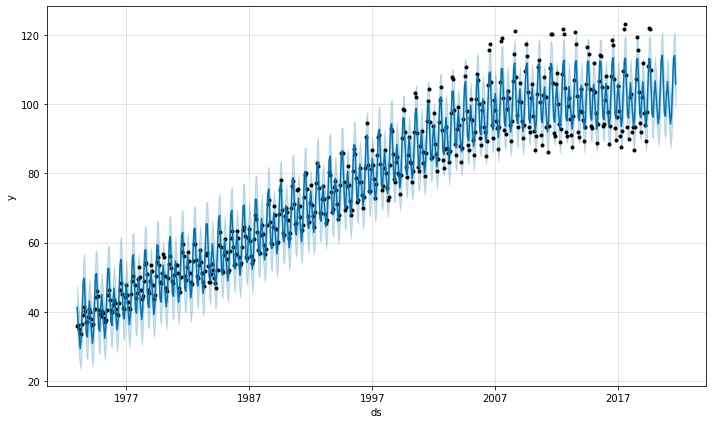

In [ ]:
# plotting the prediction
model.plot(prediction, uncertainty=True)
plt.show()
# In below graph,
 # Black dots denotes actual value. 
 # Blue line shows forecasted values.
 # Blue shaded  portion is showing uncertainty intervals.

In [ ]:
# Forward Testing
#check_fbprophet = pd.DataFrame()
#check_fbprophet['F_cast'] = prediction.yhat
#check_fbprophet['Actual'] = test.y.values
#print('MAPE for test data - ',np.mean(np.abs(check_fbprophet.Actual-check_fbprophet.F_cast)/check_fbprophet.Actual)*100,'%')

In [ ]:
# Cross validation
df_cv = cross_validation(model, initial = '14700 days',period='180 days', horizon = '365 days',)
df_cv.head()

INFO:fbprophet:Making 11 forecasts with cutoffs between 2013-09-27 00:00:00 and 2018-09-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-10-01,98.719598,92.614597,104.530996,91.8143,2013-09-27
1,2013-11-01,97.919505,91.865048,104.182576,90.4217,2013-09-27
2,2013-12-01,103.818864,97.644421,109.940639,97.8702,2013-09-27
3,2014-01-01,107.394983,101.024073,113.627023,104.3752,2013-09-27
4,2014-02-01,103.316900,97.425930,109.158649,97.7907,2013-09-27


In [ ]:
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
115,355 days,30.715207,5.542130,4.493849,0.042936,0.027053,0.692308
116,356 days,30.885824,5.557502,4.514575,0.043314,0.027053,0.692308
117,360 days,23.866630,4.885348,3.919651,0.038728,0.024334,0.769231
118,361 days,17.926731,4.233997,3.453004,0.033602,0.024334,0.846154
119,365 days,19.308601,4.394155,3.632729,0.035337,0.027053,0.846154


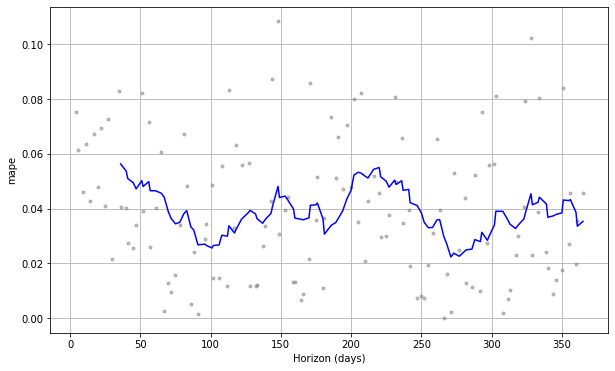

In [ ]:
# Variation of mape with horizon
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()

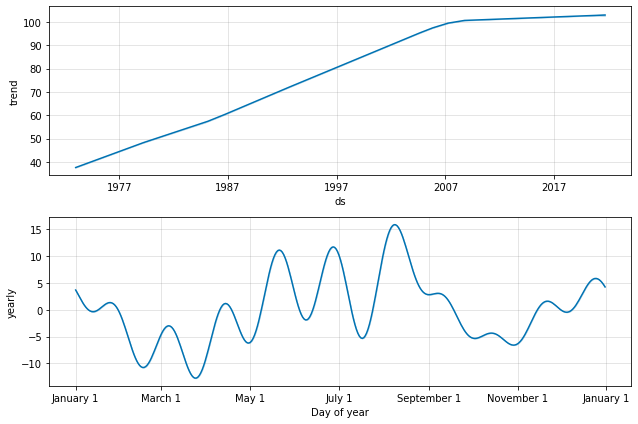

In [ ]:
# Plotting model components
model.plot_components(prediction)
plt.show()

# First plot - Yearly comparison of Consumptions
# It Shows positive linear trend till the year 2007 
# After 2007,positive trend is still seen,but rate of increase is not high as before.

# Second plot - Monthly comparison
# It shows maximum consumption occurs in month of August and September
# Least consumption occurs in April

## Forecasting techniques vs ML techniques
     # MAPE comparison for the given data using Forecasting tecniques such as Decomposition model,
     ETS model,SARIMA model and prophet model to ML techniques such as RF,Xgboost,GBM,LightGBM and Catboost

In [33]:
# Removing unnecessary features
data.drop(columns=['DATE'],inplace =True) 
data.reset_index(drop=True,inplace=True)

In [46]:
X = data[['year','month']]
y = data.Electricty_Consumption_in_TW

In [55]:
# Train test split  
# Using last 7 months data as test data
train_X,test_X,train_y,test_y = X[:554],X[554:],y[:554],y[554:]

In [154]:
# Importing required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

#### 1.Random forrest regression

In [188]:
# Hyperparameter tuning
rf_param = {'n_estimators':range(100,251,50),
            'max_depth':range(7,12),
            'min_samples_split':[1,2,3],
            'min_samples_leaf':[1,2,3]}

# Fitting the model
rf_model = GridSearchCV(RandomForestRegressor(random_state=123,oob_score=True,max_samples=0.8),
                                   param_grid=rf_param,cv=10,
                                   n_jobs=-1,verbose=True,
                                   scoring='neg_mean_squared_error').fit(train_X,train_y)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [189]:
# Best parameters
print(rf_model.best_params_)
# Best estimator
random_forrest_model = rf_model.best_estimator_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [190]:
# Predicting the y var
y_train_pred = random_forrest_model.predict(train_X)
y_test_pred = random_forrest_model.predict(test_X)

# evaluate the model using MAPE
print(' MAPE train/Backward testing:',mean_absolute_percentage_error(train_y,y_train_pred)*100)
print(' MAPE test/Forward testing:', mean_absolute_percentage_error(test_y,y_test_pred)*100)

RF_train = mean_absolute_percentage_error(train_y,y_train_pred)*100
RF_test = mean_absolute_percentage_error(test_y,y_test_pred)*100

 MAPE train/Backward testing: 1.0345823808662926
 MAPE test/Forward testing: 2.7539793465260347


#### 2.Gradient boosting regressor

In [185]:
# Hyperparameter tuning
gbm_param = {'n_estimators':range(200,451,50),
            'learning_rate':[0.01,0.1,1]}


# Fitting the model
gbm_model = GridSearchCV(GradientBoostingRegressor(random_state=123),
                                   param_grid=gbm_param,cv=10,
                                   n_jobs=-1,verbose=True,
                                   scoring='neg_mean_squared_error').fit(train_X,train_y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [186]:
# Best parameters
print(gbm_model.best_params_)
# Best estimator
gradient_boosting_model = gbm_model.best_estimator_

{'learning_rate': 0.1, 'n_estimators': 250}


In [187]:
# Predicting the y var
y_train_pred = gradient_boosting_model.predict(train_X)
y_test_pred = gradient_boosting_model.predict(test_X)

# evaluate the model using MAPE
print(' MAPE train/Backward testing:',mean_absolute_percentage_error(train_y,y_train_pred)*100)
print(' MAPE test/Forward testing:', mean_absolute_percentage_error(test_y,y_test_pred)*100)

GBM_train = mean_absolute_percentage_error(train_y,y_train_pred)*100
GBM_test = mean_absolute_percentage_error(test_y,y_test_pred)*100

 MAPE train/Backward testing: 1.2154050747794964
 MAPE test/Forward testing: 2.2589301973346796


#### 3.Catboost regressor

In [183]:
# Fitting the model
cat_model = CatBoostRegressor(loss_function='MAPE').fit(train_X,train_y)

0:	learn: 0.2762834	total: 435us	remaining: 435ms
1:	learn: 0.2707786	total: 871us	remaining: 435ms
2:	learn: 0.2675673	total: 1.09ms	remaining: 363ms
3:	learn: 0.2632939	total: 1.44ms	remaining: 358ms
4:	learn: 0.2577643	total: 1.8ms	remaining: 357ms
5:	learn: 0.2522508	total: 2.15ms	remaining: 356ms
6:	learn: 0.2465278	total: 2.51ms	remaining: 356ms
7:	learn: 0.2414150	total: 2.88ms	remaining: 357ms
8:	learn: 0.2380745	total: 3.19ms	remaining: 352ms
9:	learn: 0.2339445	total: 3.54ms	remaining: 350ms
10:	learn: 0.2290587	total: 3.86ms	remaining: 347ms
11:	learn: 0.2260048	total: 4.1ms	remaining: 338ms
12:	learn: 0.2217753	total: 4.44ms	remaining: 337ms
13:	learn: 0.2173256	total: 4.77ms	remaining: 336ms
14:	learn: 0.2132539	total: 5.11ms	remaining: 336ms
15:	learn: 0.2096612	total: 5.48ms	remaining: 337ms
16:	learn: 0.2061368	total: 5.83ms	remaining: 337ms
17:	learn: 0.2032798	total: 6.17ms	remaining: 337ms
18:	learn: 0.1994931	total: 6.52ms	remaining: 337ms
19:	learn: 0.1952337	total

408:	learn: 0.0167251	total: 146ms	remaining: 211ms
409:	learn: 0.0167069	total: 147ms	remaining: 211ms
410:	learn: 0.0166946	total: 147ms	remaining: 211ms
411:	learn: 0.0166789	total: 147ms	remaining: 210ms
412:	learn: 0.0166588	total: 148ms	remaining: 210ms
413:	learn: 0.0166468	total: 148ms	remaining: 210ms
414:	learn: 0.0166270	total: 149ms	remaining: 209ms
415:	learn: 0.0166009	total: 149ms	remaining: 209ms
416:	learn: 0.0165830	total: 149ms	remaining: 209ms
417:	learn: 0.0165596	total: 150ms	remaining: 208ms
418:	learn: 0.0165353	total: 150ms	remaining: 208ms
419:	learn: 0.0165139	total: 150ms	remaining: 208ms
420:	learn: 0.0165035	total: 151ms	remaining: 207ms
421:	learn: 0.0164877	total: 151ms	remaining: 207ms
422:	learn: 0.0164688	total: 152ms	remaining: 207ms
423:	learn: 0.0164586	total: 152ms	remaining: 206ms
424:	learn: 0.0164386	total: 152ms	remaining: 206ms
425:	learn: 0.0164230	total: 153ms	remaining: 206ms
426:	learn: 0.0164145	total: 153ms	remaining: 205ms
427:	learn: 

825:	learn: 0.0130562	total: 299ms	remaining: 63ms
826:	learn: 0.0130549	total: 299ms	remaining: 62.6ms
827:	learn: 0.0130486	total: 300ms	remaining: 62.2ms
828:	learn: 0.0130450	total: 300ms	remaining: 61.9ms
829:	learn: 0.0130441	total: 300ms	remaining: 61.5ms
830:	learn: 0.0130431	total: 301ms	remaining: 61.2ms
831:	learn: 0.0130422	total: 301ms	remaining: 60.8ms
832:	learn: 0.0130414	total: 302ms	remaining: 60.5ms
833:	learn: 0.0130396	total: 302ms	remaining: 60.1ms
834:	learn: 0.0130384	total: 302ms	remaining: 59.7ms
835:	learn: 0.0130369	total: 303ms	remaining: 59.4ms
836:	learn: 0.0130362	total: 303ms	remaining: 59ms
837:	learn: 0.0130356	total: 303ms	remaining: 58.7ms
838:	learn: 0.0130349	total: 304ms	remaining: 58.3ms
839:	learn: 0.0130316	total: 304ms	remaining: 57.9ms
840:	learn: 0.0130239	total: 305ms	remaining: 57.6ms
841:	learn: 0.0130205	total: 305ms	remaining: 57.2ms
842:	learn: 0.0130192	total: 305ms	remaining: 56.9ms
843:	learn: 0.0130132	total: 306ms	remaining: 56.5

In [184]:
# Predicting the y var
y_train_pred = cat_model.predict(train_X)
y_test_pred = cat_model.predict(test_X)

# evaluate the model using MAPE
print(' MAPE train/Backward testing:',mean_absolute_percentage_error(train_y,y_train_pred)*100)
print(' MAPE test/Forward testing:', mean_absolute_percentage_error(test_y,y_test_pred)*100)

catboost_train = mean_absolute_percentage_error(train_y,y_train_pred)*100
catboost_test = mean_absolute_percentage_error(test_y,y_test_pred)*100

 MAPE train/Backward testing: 1.2495113812184133
 MAPE test/Forward testing: 3.3054811906313715


#### 4.Light GBM regressor

In [180]:
# Hyperparameter tuning
LGBM_para = {'n_estimators':range(100,251,50),
            'learning_rate':[0.01,0.1,1]}

# Fitting the model
LGBM_fit = GridSearchCV(LGBMRegressor(),param_grid=LGBM_para,
                       cv=10,n_jobs=-1,verbose=True,
                       scoring='neg_mean_squared_error').fit(train_X,train_y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [181]:
# Best parameters
print(LGBM_fit.best_params_)
# Best estimator
LGB_model = LGBM_fit.best_estimator_

{'learning_rate': 0.1, 'n_estimators': 150}


In [182]:
# Predicting the y var
y_train_pred = LGB_model.predict(train_X)
y_test_pred = LGB_model.predict(test_X)

# evaluate the model using MAPE
print(' MAPE train/Backward testing:',mean_absolute_percentage_error(train_y,y_train_pred)*100)
print(' MAPE test/Forward testing:', mean_absolute_percentage_error(test_y,y_test_pred)*100)

LGBM_train = mean_absolute_percentage_error(train_y,y_train_pred)*100
LGBM_test = mean_absolute_percentage_error(test_y,y_test_pred)*100

 MAPE train/Backward testing: 1.4032605017793183
 MAPE test/Forward testing: 2.8764406057697833


#### 5.XG boost regressor

In [177]:
# Hyperparameter tuning
XGB_param = {'n_estimators':range(250,401,50),'max_depth':range(2,8),
             'learning_rate':[0.01,0.1,1]}

# Fitting the model
XGB_model = GridSearchCV(XGBRegressor(),
                        param_grid=XGB_param,
                        n_jobs=-1,
                        cv=10,verbose=True,
                        scoring='neg_mean_squared_error').fit(train_X,train_y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


In [178]:
# Best parameters
print(XGB_model.best_params_)
# Best estimator
XGB_Model = XGB_model.best_estimator_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [179]:
# Predicting the y var
y_train_pred = XGB_Model.predict(train_X)
y_test_pred = XGB_Model.predict(test_X)

# evaluate the model using MAPE
print(' MAPE train/Backward testing:',mean_absolute_percentage_error(train_y,y_train_pred)*100)
print(' MAPE test/Forward testing:', mean_absolute_percentage_error(test_y,y_test_pred)*100)

XGB_train = mean_absolute_percentage_error(train_y,y_train_pred)*100
XGB_test = mean_absolute_percentage_error(test_y,y_test_pred)*100

 MAPE train/Backward testing: 1.2213096678977633
 MAPE test/Forward testing: 2.7326709761242602


In [236]:
# Comparing MAPE for different techniques
Comparison = pd.DataFrame()

Comparison['Type_of_technqiue'] = ['ETS model (Timeseries)','SARIMA model (Timeseries)','Random forrest (ML)','Gradient boosting (ML)','Catboost (ML)','Light GBM (ML)',
                                  'XGboost (ML)']

Comparison['Forward testing'] = [ETS_fwd_test,SARIMA_fwd_test,RF_test,GBM_test,
                                 catboost_test,LGBM_test,XGB_test]

Comparison['Backward testing'] = [ETS_bwd_test,SARIMA_bwd_test,RF_train,GBM_train,
                                 catboost_train,LGBM_train,XGB_train]

Comparison.sort_values(by='Forward testing',ignore_index=True)

,Type_of_technqiue,Forward testing,Backward testing
0,ETS model (Timeseries),0.856015,2.531519
1,Gradient boosting (ML),2.258930,1.215405
2,XGboost (ML),2.732671,1.221310
3,Random forrest (ML),2.753979,1.034582
4,Light GBM (ML),2.876441,1.403261
5,Catboost (ML),3.305481,1.249511
6,SARIMA model (Timeseries),3.547530,2.587485


## Conclusion:
        1.In case of MAPE calculation for test data or forward testing , ETS model(time series)                 performs better than any ML model.
        2. In case of MAPE calulation for train data or backward testing,every ML model performs               better than any time series model.